In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sars=pd.read_csv('sample_data/sars_2003.csv', index_col=['Date'], parse_dates=['Date'])
sars.head()

,Country,Cumulative number of case(s),Number of deaths,Number recovered
Date,,,,
2003-03-17,Germany,1,0,0
2003-03-17,Canada,8,2,0
2003-03-17,Singapore,20,0,0
2003-03-17,"Hong Kong SAR, China",95,1,0
2003-03-17,Switzerland,2,0,0


In [ ]:
sars.describe()
sarslist=sars.iloc[:,1:3].values
print(sarslist[5][1])

0


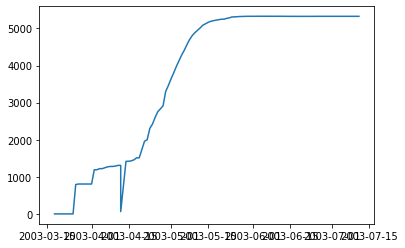

DatetimeIndex(['2003-03-18', '2003-03-19', '2003-03-20', '2003-03-21',
               '2003-03-22', '2003-03-23', '2003-03-24', '2003-03-25',
               '2003-03-26', '2003-03-27',
               ...
               '2003-07-02', '2003-07-03', '2003-07-04', '2003-07-05',
               '2003-07-06', '2003-07-07', '2003-07-08', '2003-07-09',
               '2003-07-10', '2003-07-11'],
              dtype='datetime64[ns]', name='Date', length=116, freq='D')


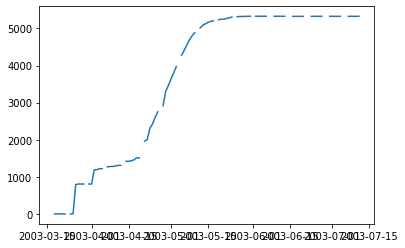

In [ ]:
data=sars[sars.Country=='China']
plt.plot(data.iloc[:,1])
plt.show()
data = data.loc[~data.index.duplicated()]
data = data.asfreq('d')
print(data.index)
plt.plot(data.iloc[:,1])
plt.show()


Data is given by day, but some days are missing.
Some of the days have duplicate input, e.g., '2003-03-12' in 'China'

First for each country seperate the data. 
data=sars[sars.Country=='China']

First, I though may be fixing the date would be fine. But the value is also very low. 
So remove, those duplicate dates for each country. 
data = data.loc[~data.index.duplicated(keep='first')]

Set, what frequency used in data. If those are daily and some of them are missing value will be replaced by Nan/0.
data = data.asfreq('d')





In [ ]:
#impute_data=data['Cumulative number of case(s)'].fillna(data['Cumulative number of case(s)'].rolling(4,min_periods=1).mean())
impute_data=data['Cumulative number of case(s)'].interpolate(method='linear')
print(data['Cumulative number of case(s)'].values, impute_data.values)

[   0.    0.    0.    0.    0.   nan    0.    0.  792.  806.  806.  806.
   nan  806.  806. 1190. 1190. 1220. 1220.   nan 1268. 1279. 1280. 1290.
 1309. 1309.   nan 1418. 1418. 1432. 1457. 1512. 1512.   nan 1959. 2001.
 2305. 2422. 2601. 2753.   nan 2914. 3303. 3460. 3638. 3799. 3971.   nan
 4280. 4409. 4560. 4698. 4805. 4884.   nan 5013. 5086. 5124. 5163. 5191.
 5209.   nan 5236. 5248. 5249. 5271. 5285. 5309.   nan 5316. 5322. 5323.
 5325. 5328. 5328.   nan 5328. 5329. 5329. 5329. 5329.   nan   nan 5328.
 5328. 5329. 5328. 5327.   nan   nan 5326. 5326. 5326. 5326. 5326.   nan
   nan 5326. 5326. 5327. 5327. 5327.   nan   nan 5327. 5327. 5327. 5327.
 5327.   nan   nan 5327. 5327. 5327. 5327. 5327.] [   0.            0.            0.            0.            0.
    0.            0.            0.          792.          806.
  806.          806.          806.          806.          806.
 1190.         1190.         1220.         1220.         1244.
 1268.         1279.         1280.       

Different impute method: 
Interpolate and Fillna

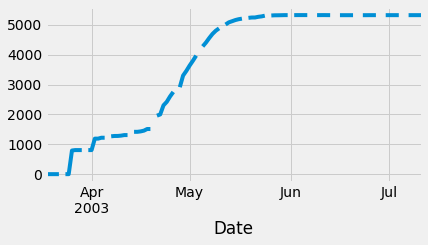

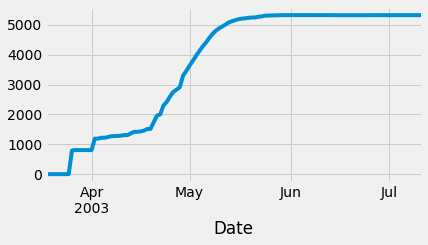

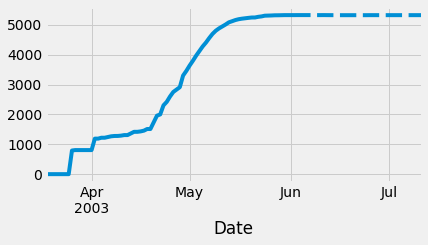

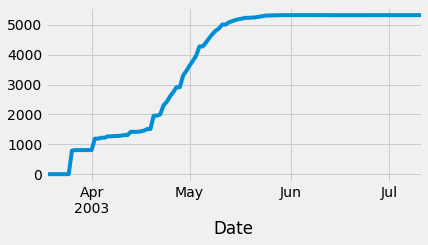

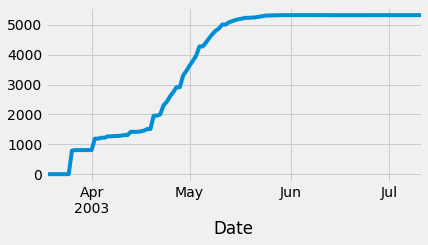

In [ ]:
data['Cumulative number of case(s)'].plot(figsize=(6,3))
plt.show()
data['Cumulative number of case(s)'].interpolate(method='linear').plot(figsize = (6,3))
plt.show()
data['Cumulative number of case(s)'].interpolate(limit=1, limit_direction='forward').plot(figsize = (6,3))
plt.show()
data['Cumulative number of case(s)'].fillna(value=None, method='backfill', axis=None, limit=None, downcast=None).plot(figsize = (6,3))
plt.show()
data['Cumulative number of case(s)'].fillna(value=None, method='backfill', axis=None, limit=7, downcast=None).plot(figsize = (6,3))
plt.show()


In [ ]:
#from datetime import datetime
#data.tail()
#cdate = datetime(2003,7,11)
#print(cdate)
#data.index[23]=cdate

In [ ]:
y=data['Cumulative number of case(s)']
y['2003-04-12']
#data.mean()


1309.0

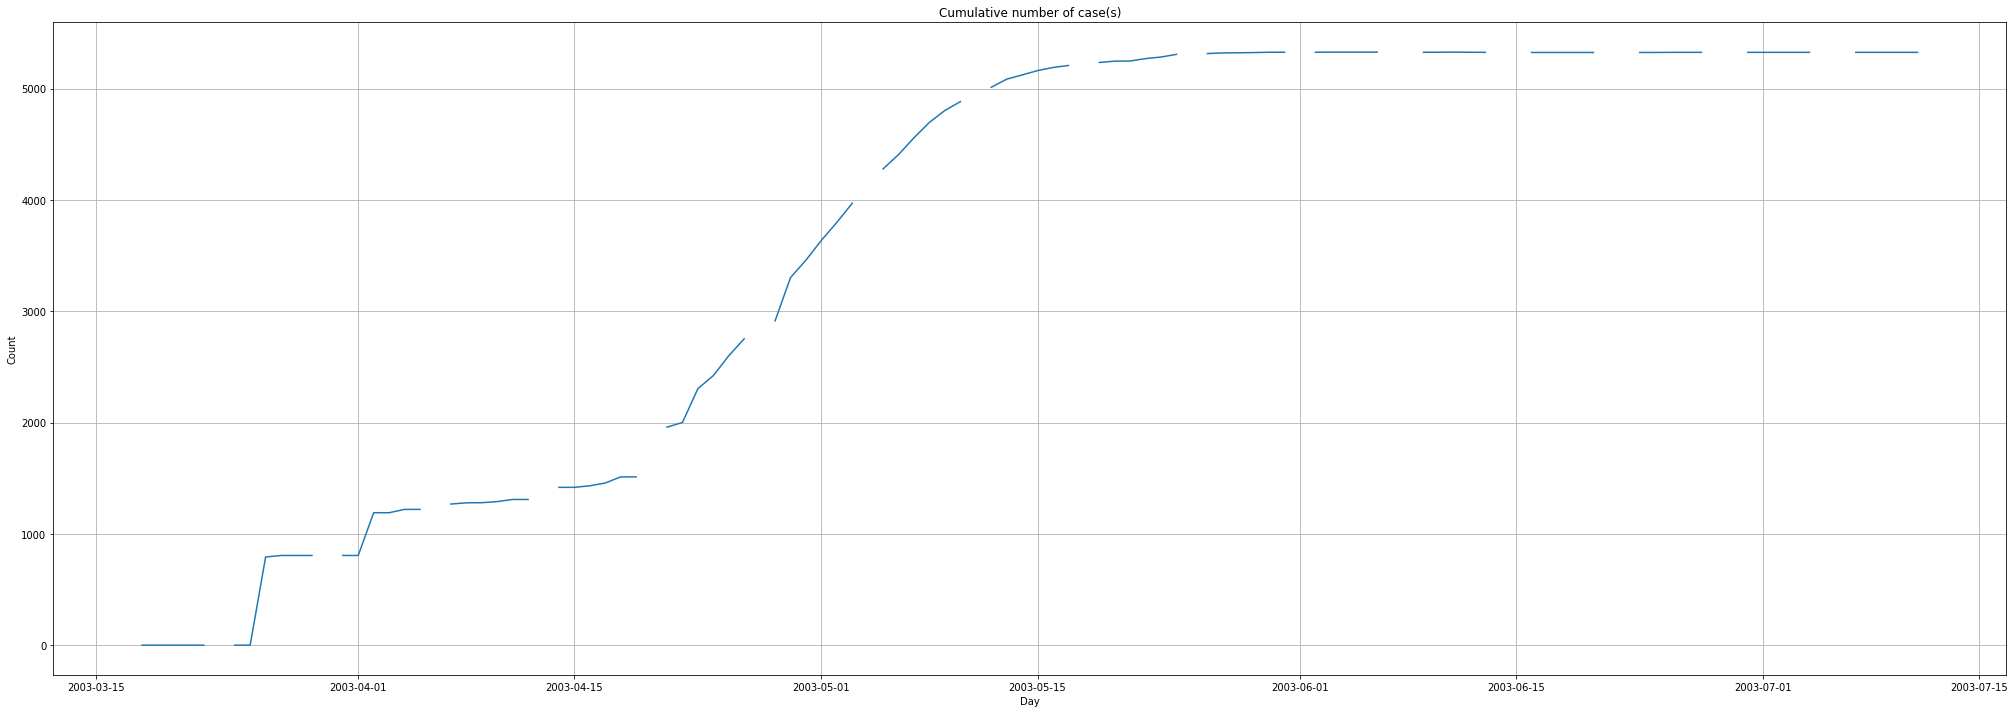

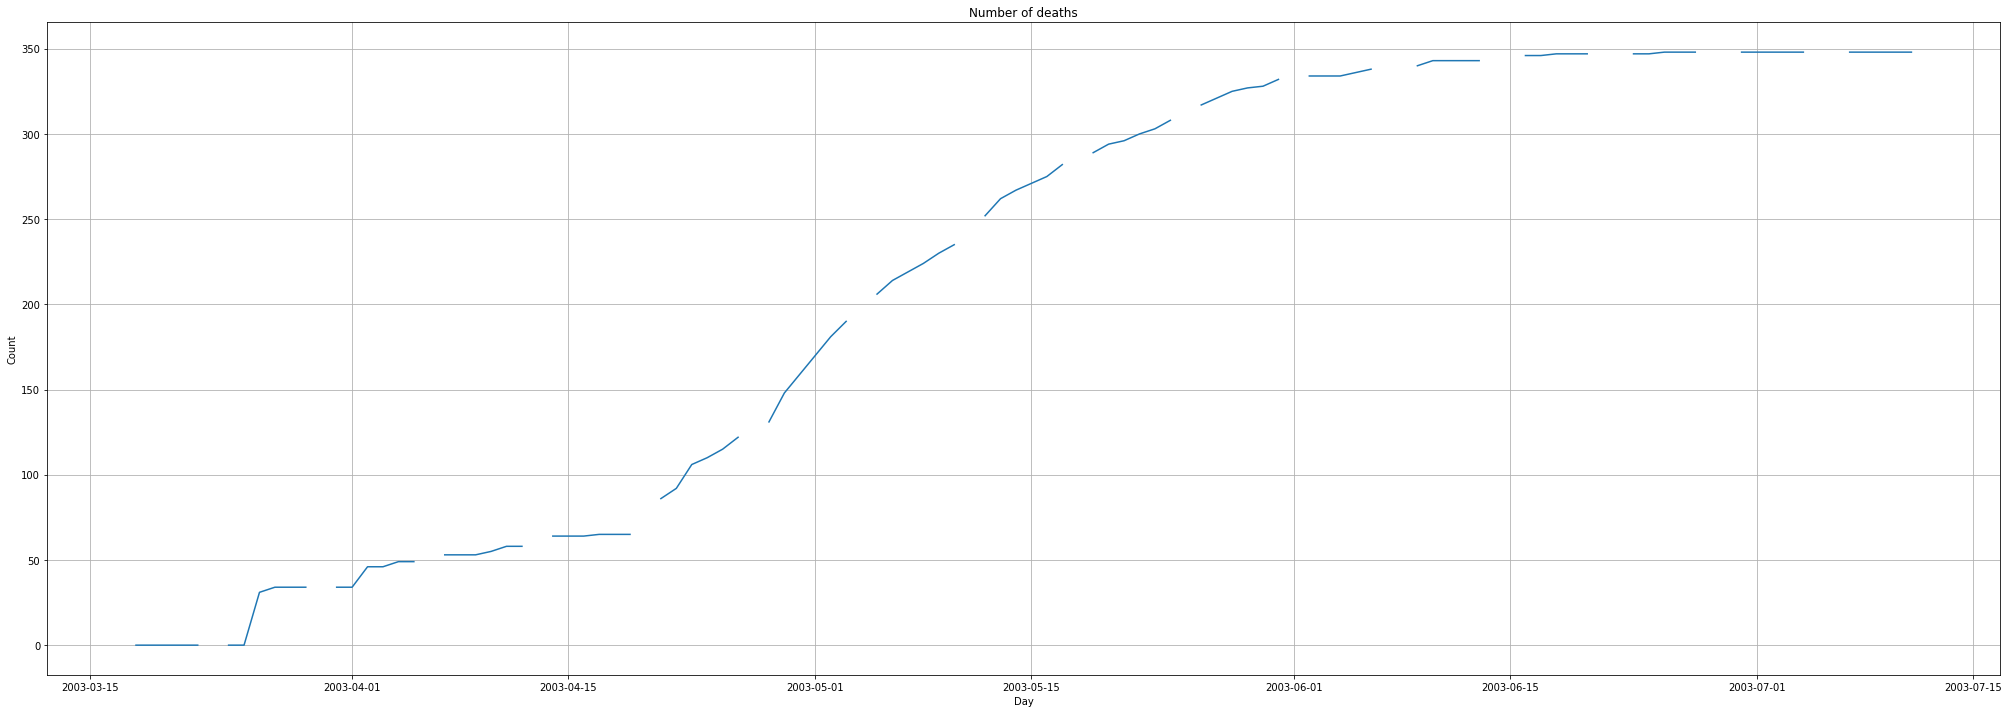

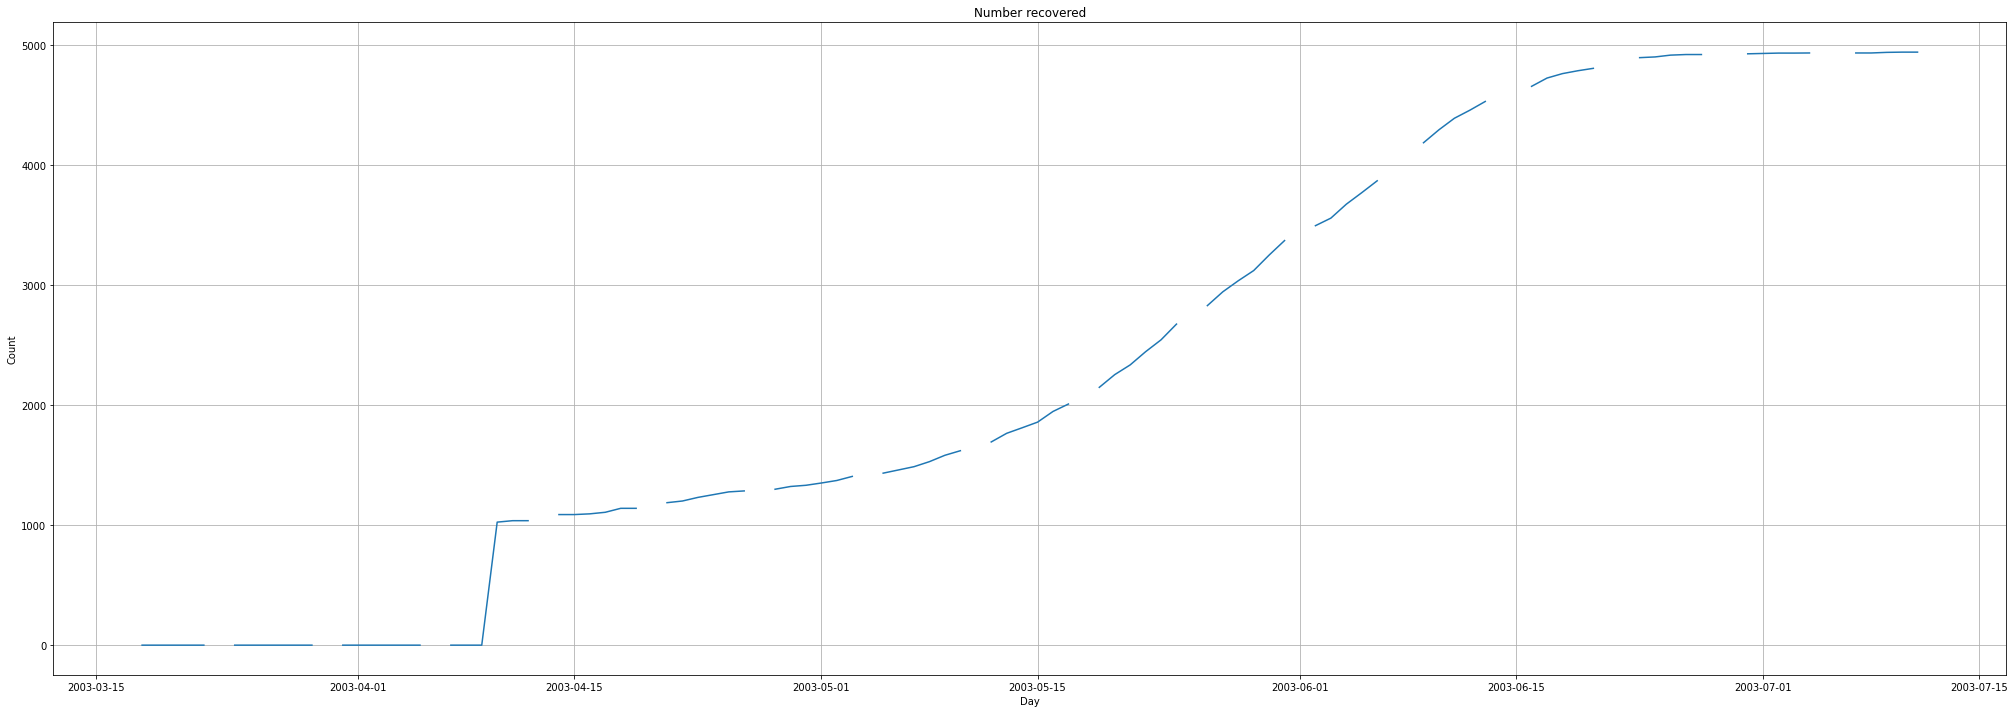

In [ ]:
for i in range(1,sars.shape[1]):
  colname=data.columns
  plt.figure(figsize=(35, 12))
  data=sars[sars['Country']=='China']
  data = data.loc[~data.index.duplicated(keep='first')]
  data = data.asfreq('d')
  plt.plot(data.iloc[:,i])
  plt.title(colname[i])
  plt.ylabel('Count')
  plt.xlabel('Day')
  plt.grid(True)
  #plt.legend(country)
  plt.show()

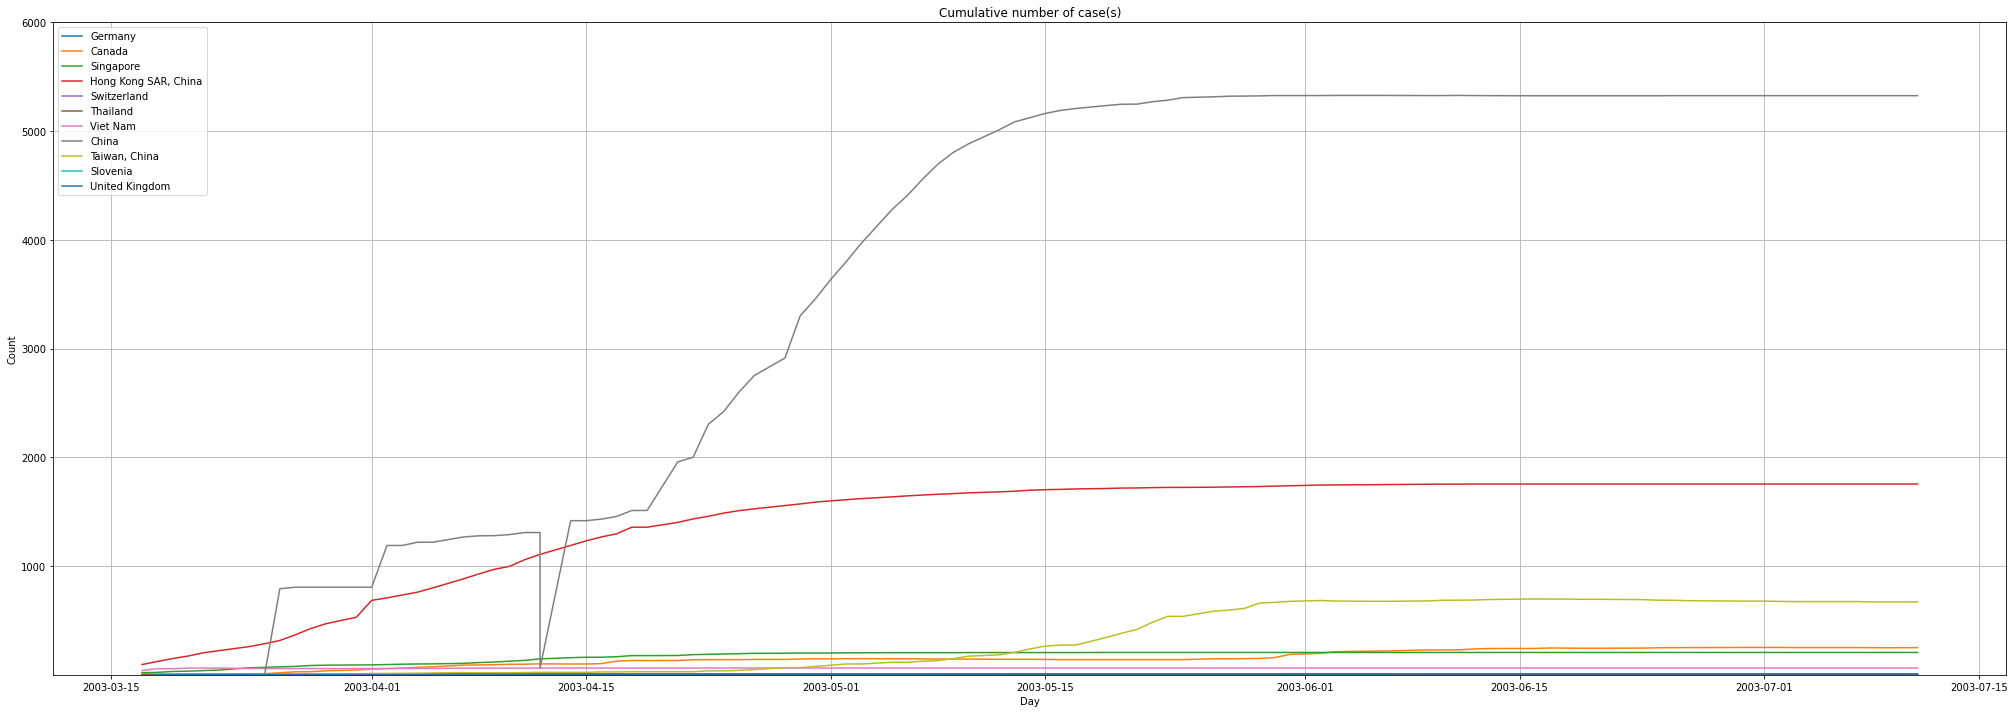

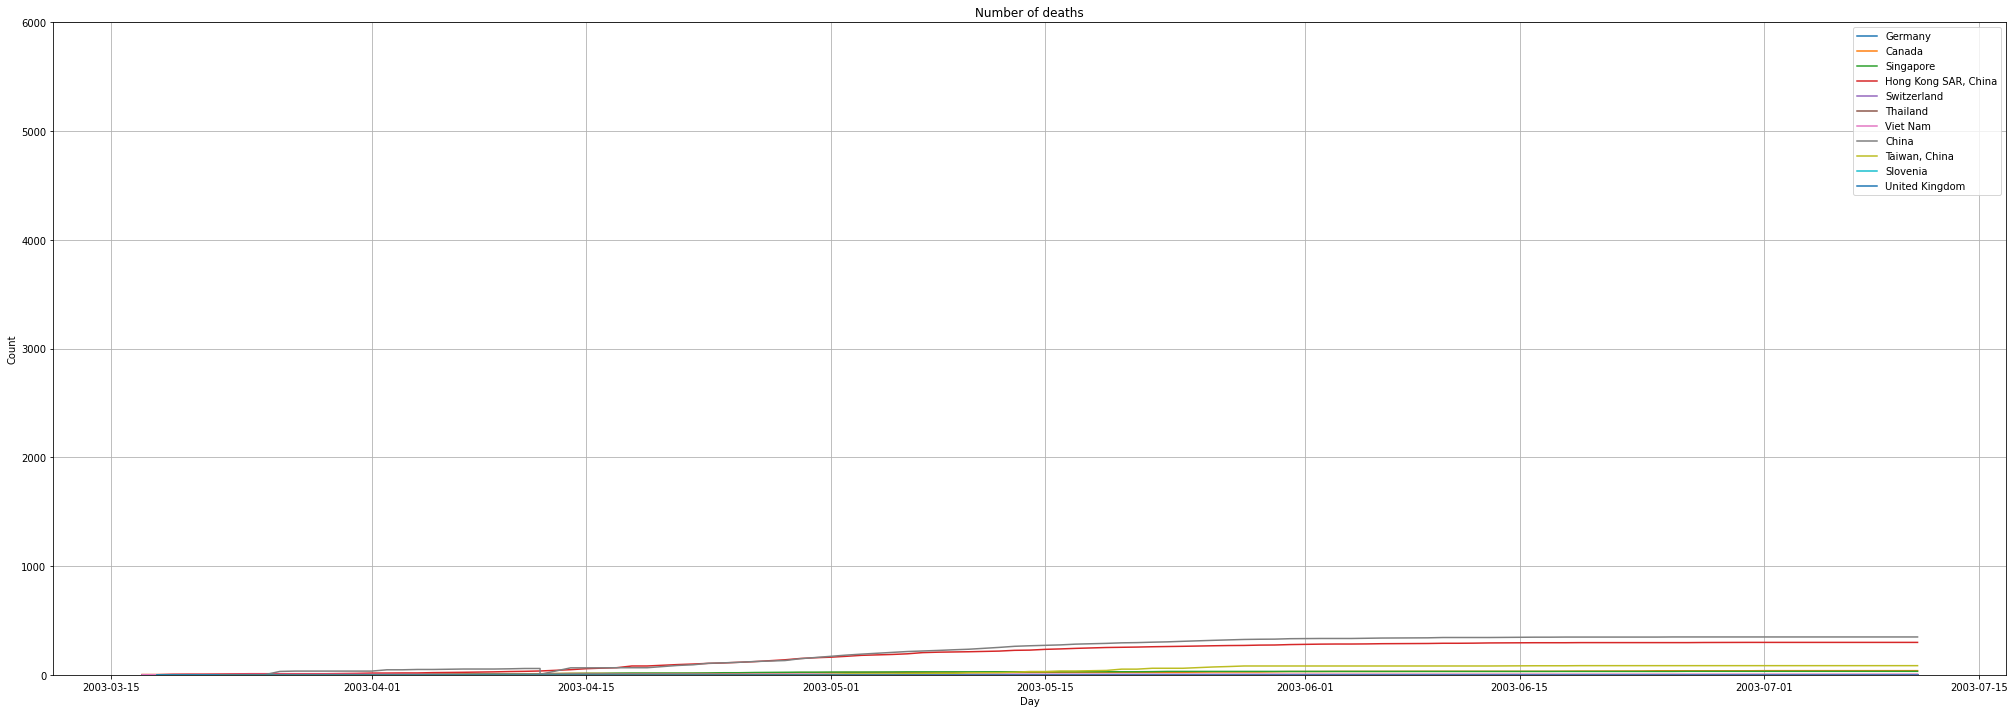

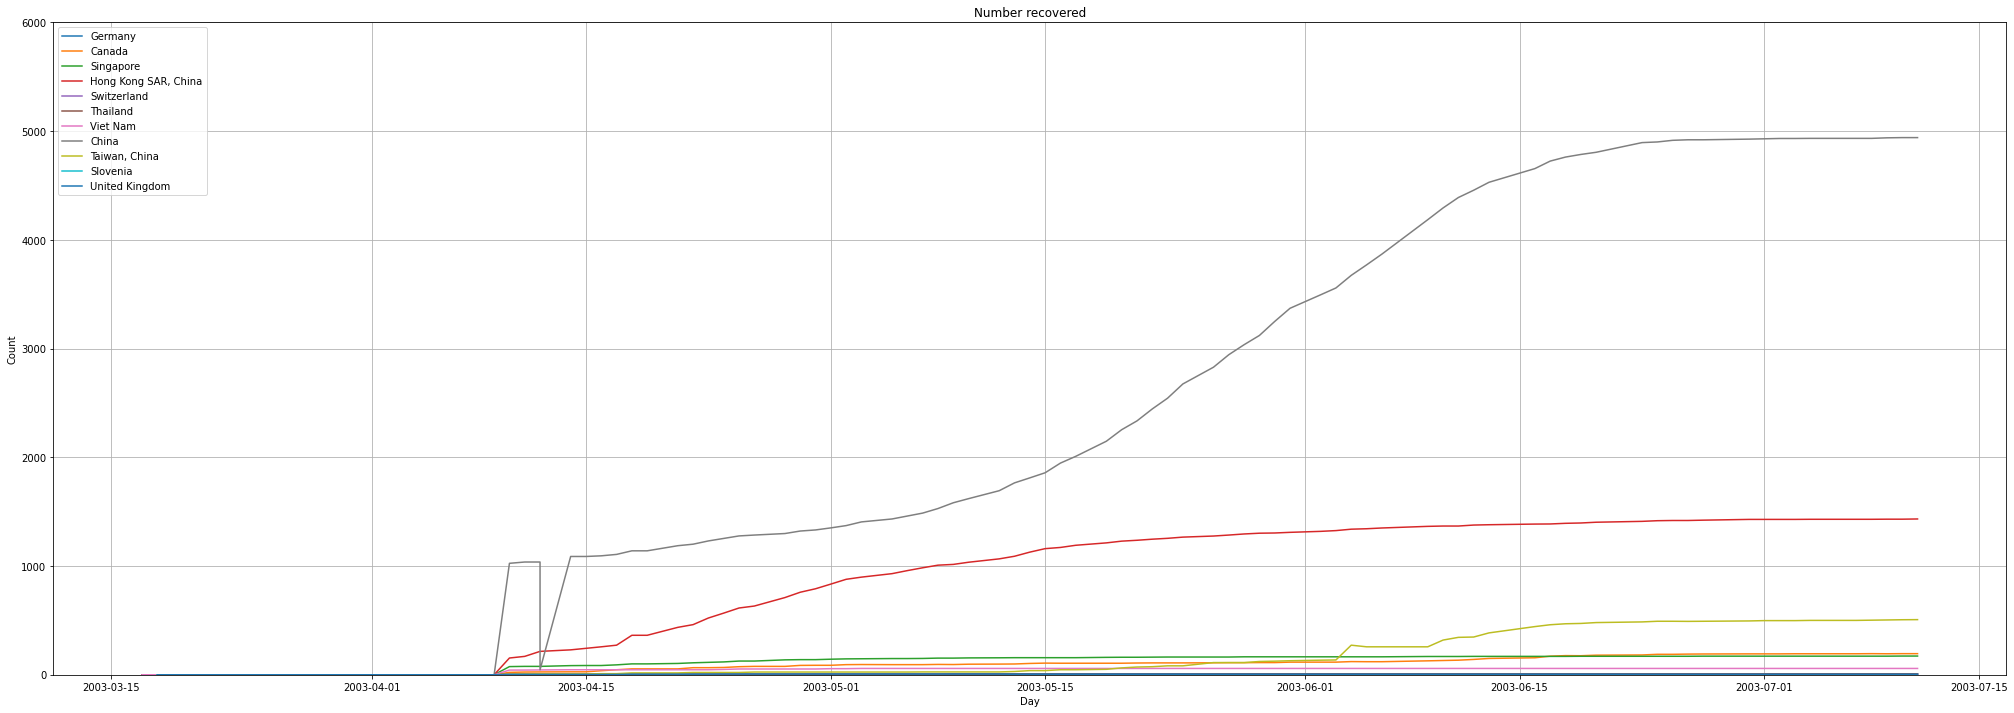

In [ ]:
# Plot closing price
country=sars.Country.unique().tolist()
for i in range(1,sars.shape[1]):
  colname=data.columns
  plt.figure(figsize=(35, 12))
  for j, c in enumerate(country):
    data=sars[sars['Country']==c]
    #data = data.loc[~data.index.duplicated(keep='first')]
    #data = data.asfreq('d')
    plt.plot(data.iloc[:,i], label=c)
    plt.title(colname[i])
    plt.ylabel('Count')
    plt.xlabel('Day')
    plt.ylim(top=6000)
    plt.grid(True)
    y_pos = data.iloc[-1,i] - 0.5
    #plt.text(date('2003-07-15'), y_pos, c)
    if j==10: break
  plt.legend()
  plt.show()

In [ ]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

In [ ]:
#rcParams['figure.figsize'] = 18, 8
#decomposition = sm.tsa.seasonal_decompose(y, model='additive')
#fig = decomposition.plot()
#plt.show()

In [ ]:
#plt.plot(y)

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
y

Date
2003-03-18       0.0
2003-03-19       0.0
2003-03-20       0.0
2003-03-21       0.0
2003-03-22       0.0
               ...  
2003-07-07    5327.0
2003-07-08    5327.0
2003-07-09    5327.0
2003-07-10    5327.0
2003-07-11    5327.0
Freq: D, Name: Cumulative number of case(s), Length: 116, dtype: float64

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1834.7363684923826
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1585.4041222404176
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1410.080588926094
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1200.9708184476453
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1403.5111866922048
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1380.7639185333426
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1209.6601457291144


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1194.5989305166543
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1734.72068462039
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1477.5728067194689
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1310.4947046306063
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1111.9436002290827
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1320.3605151877464


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1284.7781728734985
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1141.0108566402846


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1112.0320765298056
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1178.1715330349728
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1000.3186368804595
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1071.2100479591177


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:3041.181923785323
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1020.1409419543448
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1002.2857500086154
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:913.0758961010857
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:902.5743677567217
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1164.53091876444
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:981.7283857029082
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1059.4254629892669


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2822.4771103873645
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1012.1622564127872
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:983.7257874462127
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:909.3460484764928
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:897.8259084952269
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1185.868832435354


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1013.0065191550121
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:1088.4497009765605
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:919.7153851404823
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:1019.9593757402006


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1015.005744407018
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:914.7967675085255
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:914.1054359403552
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1174.6112662128114
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:991.0848299368258
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1072.849747590288
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:909.3605812038069
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1013.0799815069507


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:993.1296432293134
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:910.429607161602
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:884.1612502115581
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1173.614147878814
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:984.2777904229407
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1069.8857995495273


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2796.0086821668556
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:989.5551948951293
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:986.2523432531841
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:894.7164997708927
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:894.6483022031454
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1142.8152561584752
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:947.3569413841567
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1054.4630447644345


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2732.419886629982
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:959.9188766219039
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:949.3186142312823
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:885.6212218984248
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:882.1826937936461


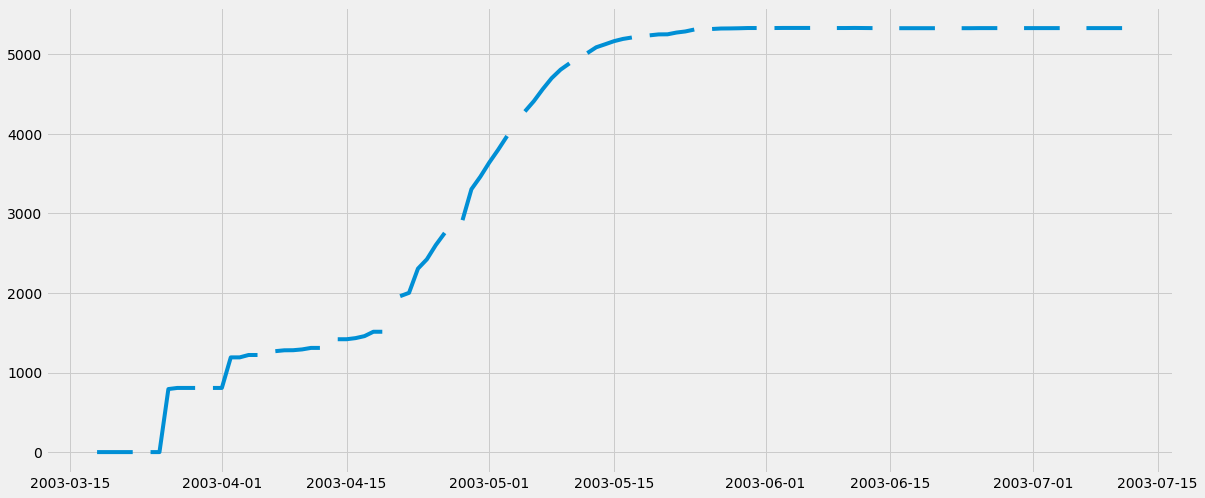

In [ ]:
plt.plot(y)
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,order=param,seasonal_order=param_seasonal,enforce_stationarity=False, enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9419      0.058     16.236      0.000       0.828       1.056
ma.L1         -0.7216      0.124     -5.814      0.000      -0.965      -0.478
ar.S.L12      -0.2798      0.071     -3.943      0.000      -0.419      -0.141
ma.S.L12      -0.5923      0.162     -3.646      0.000      -0.911      -0.274
sigma2      6530.7036    825.051      7.916      0.000    4913.634    8147.773


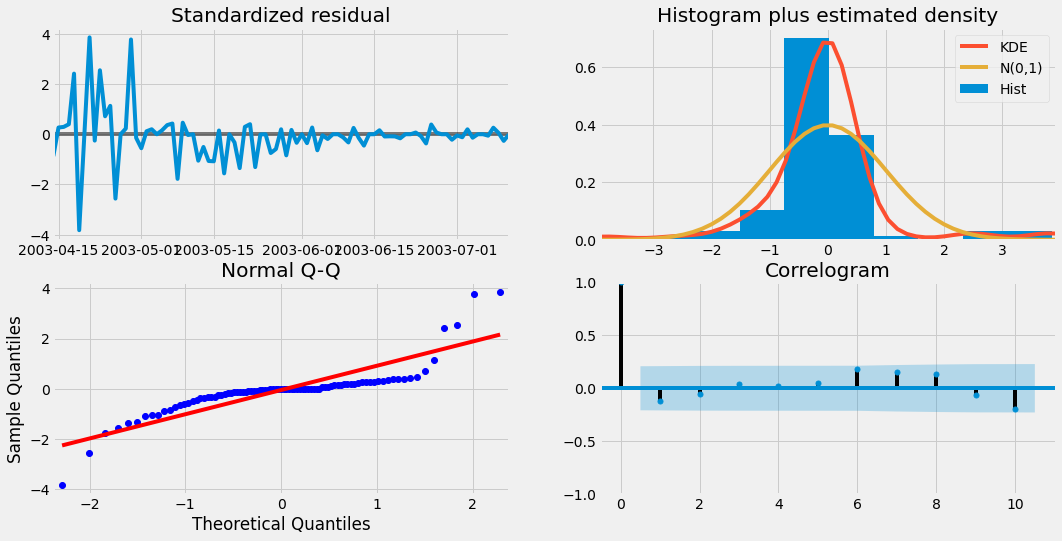

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

            lower Cumulative number of case(s)  upper Cumulative number of case(s)
Date                                                                              
2003-05-01                         3503.807357                         3878.744454
2003-05-02                         3621.790290                         3956.138479
2003-05-03                         3785.537334                         4122.336877
2003-05-04                         3913.867565                         4242.888886
2003-05-05                         3998.909877                         4519.566716
...                                        ...                                 ...
2003-07-07                         4998.187438                         5675.747764
2003-07-08                         5138.508658                         5471.226480
2003-07-09                         5157.064879                         5487.716921
2003-07-10                         5182.057297                         5517.142207
2003

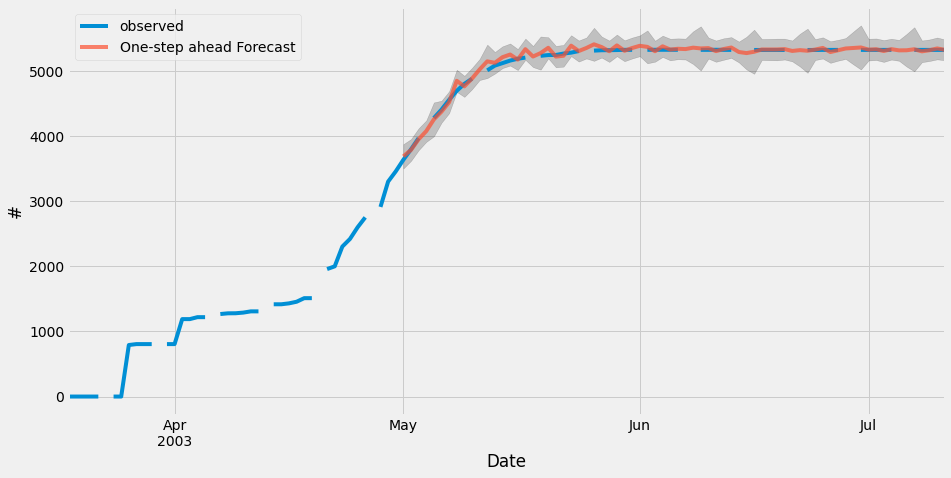

In [ ]:
pred = results.get_prediction(start='2003-05-01', dynamic=False)
pred_ci = pred.conf_int()
print(pred_ci)
ax = y[0:].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('#')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2003-05-01':]
print(type(y_forecasted), type(y_truth))

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse),2)))

<class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
The Mean Squared Error of our forecasts is 2571.65
The Root Mean Squared Error of our forecasts is 50.71


In [ ]:
print(y.index)
print(y[0:])

DatetimeIndex(['2003-03-18', '2003-03-19', '2003-03-20', '2003-03-21',
               '2003-03-22', '2003-03-23', '2003-03-24', '2003-03-25',
               '2003-03-26', '2003-03-27',
               ...
               '2003-07-02', '2003-07-03', '2003-07-04', '2003-07-05',
               '2003-07-06', '2003-07-07', '2003-07-08', '2003-07-09',
               '2003-07-10', '2003-07-11'],
              dtype='datetime64[ns]', name='Date', length=116, freq='D')
Date
2003-03-18       0.0
2003-03-19       0.0
2003-03-20       0.0
2003-03-21       0.0
2003-03-22       0.0
               ...  
2003-07-07    5327.0
2003-07-08    5327.0
2003-07-09    5327.0
2003-07-10    5327.0
2003-07-11    5327.0
Freq: D, Name: Cumulative number of case(s), Length: 116, dtype: float64


In [ ]:

datelist = pd.date_range(start='2003-07-11', periods=10, freq='15D').strftime("%Y-%m-%d").tolist()
datelist


['2003-07-11',
 '2003-07-26',
 '2003-08-10',
 '2003-08-25',
 '2003-09-09',
 '2003-09-24',
 '2003-10-09',
 '2003-10-24',
 '2003-11-08',
 '2003-11-23']

            lower Cumulative number of case(s)  upper Cumulative number of case(s)
2003-07-12                         5167.934742                         5488.242317
2003-07-13                         5078.765473                         5582.993383
2003-07-14                         4998.279932                         5676.250168
2003-07-15                         4901.195158                         5755.750177
2003-07-16                         4824.844064                         5854.026449
...                                        ...                                 ...
2003-10-15                        -7441.752428                        18700.477304
2003-10-16                        -7624.699130                        18888.927310
2003-10-17                        -7806.037988                        19079.916994
2003-10-18                        -7985.536435                        19274.376932
2003-10-19                        -8177.698772                        19457.491079

[10

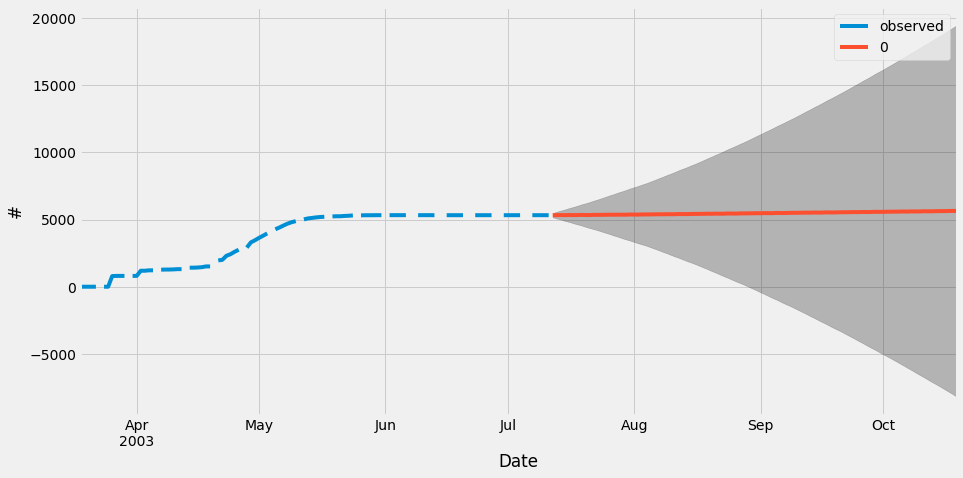

In [ ]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
print(pred_ci)

ax = y.plot(label='observed', figsize=(14, 7))
y_forecast=pd.DataFrame(pred_uc.predicted_mean)
#y_forecast.index=datelist
#print(y_forecast)
y_forecast.plot(ax=ax, label='Forecast')
#ax.plot(y_forecast.index, y_forecast.iloc[:,0])
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('#')
plt.legend()
plt.show()

Let's use LSTM for prediction on data y (Cumulative number of cases china)

In [ ]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [ ]:
cdata=sars[sars.Country=='China']
dataset=cdata.iloc[:,1].values
dataset=dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler=MinMaxScaler(feature_range=(0,1))
print(dataset)
dataset=scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



[[   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 792.]
 [ 806.]
 [ 806.]
 [ 806.]
 [ 806.]
 [ 806.]
 [1190.]
 [1190.]
 [1220.]
 [1220.]
 [1268.]
 [1279.]
 [1280.]
 [1290.]
 [1309.]
 [1309.]
 [  62.]
 [1418.]
 [1418.]
 [1432.]
 [1457.]
 [1512.]
 [1512.]
 [1959.]
 [2001.]
 [2305.]
 [2422.]
 [2601.]
 [2753.]
 [2914.]
 [3303.]
 [3460.]
 [3638.]
 [3799.]
 [3971.]
 [4280.]
 [4409.]
 [4560.]
 [4698.]
 [4805.]
 [4884.]
 [5013.]
 [5086.]
 [5124.]
 [5163.]
 [5191.]
 [5209.]
 [5236.]
 [5248.]
 [5249.]
 [5271.]
 [5285.]
 [5309.]
 [5316.]
 [5322.]
 [5323.]
 [5325.]
 [5328.]
 [5328.]
 [5328.]
 [5329.]
 [5329.]
 [5329.]
 [5329.]
 [5328.]
 [5328.]
 [5329.]
 [5328.]
 [5327.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]]


In [ ]:
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

print(X_train, Y_train)
print(X_test, Y_test)

[[[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.        ]]

 [[0.14862075]]

 [[0.15124789]]

 [[0.15124789]]

 [[0.15124789]]

 [[0.15124789]]

 [[0.15124789]]

 [[0.22330643]]

 [[0.22330643]]

 [[0.228936  ]]

 [[0.228936  ]]

 [[0.23794332]]

 [[0.2400075 ]]

 [[0.24019516]]

 [[0.24207167]]

 [[0.24563707]]

 [[0.24563707]]

 [[0.01163445]]

 [[0.2660912 ]]

 [[0.2660912 ]]

 [[0.26871833]]

 [[0.27340963]]

 [[0.28373054]]

 [[0.28373054]]

 [[0.36761117]]

 [[0.37549257]]

 [[0.43253893]]

 [[0.45449427]]

 [[0.48808405]]

 [[0.5166072 ]]

 [[0.54681927]]

 [[0.61981606]]

 [[0.6492775 ]]

 [[0.68267965]]

 [[0.7128917 ]]

 [[0.7451679 ]]

 [[0.80315256]]

 [[0.8273597 ]]

 [[0.85569525]]

 [[0.88159126]]

 [[0.9016701 ]]

 [[0.9164946 ]]

 [[0.9407018 ]]

 [[0.9544004 ]]

 [[0.9615312 ]]

 [[0.96884966]]

 [[0.9741039 ]]

 [[0.97748166]]

 [[0.9825483 ]]

 [[0.9848001 ]]

 [[0.9849878 ]]

 [[0.98911613]]

 [[0.99174327]

In [ ]:
model = Sequential()
model.add(LSTM(5, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=1, validation_data=(X_test, Y_test), verbose=2, shuffle=True)

model.summary()

Train on 62 samples, validate on 30 samples
Epoch 1/20
 - 1s - loss: 0.4840 - val_loss: 1.1124
Epoch 2/20
 - 0s - loss: 0.3641 - val_loss: 0.9335
Epoch 3/20
 - 0s - loss: 0.2988 - val_loss: 0.7714
Epoch 4/20
 - 0s - loss: 0.2382 - val_loss: 0.6373
Epoch 5/20
 - 0s - loss: 0.2129 - val_loss: 0.5234
Epoch 6/20
 - 0s - loss: 0.1888 - val_loss: 0.4359
Epoch 7/20
 - 0s - loss: 0.1635 - val_loss: 0.3782
Epoch 8/20
 - 0s - loss: 0.1313 - val_loss: 0.3161
Epoch 9/20
 - 0s - loss: 0.1039 - val_loss: 0.2696
Epoch 10/20
 - 0s - loss: 0.1333 - val_loss: 0.2339
Epoch 11/20
 - 0s - loss: 0.1273 - val_loss: 0.2074
Epoch 12/20
 - 0s - loss: 0.1043 - val_loss: 0.1799
Epoch 13/20
 - 0s - loss: 0.1308 - val_loss: 0.1746
Epoch 14/20
 - 0s - loss: 0.0964 - val_loss: 0.1541
Epoch 15/20
 - 0s - loss: 0.1230 - val_loss: 0.1505
Epoch 16/20
 - 0s - loss: 0.0897 - val_loss: 0.1374
Epoch 17/20
 - 0s - loss: 0.0923 - val_loss: 0.1406
Epoch 18/20
 - 0s - loss: 0.0878 - val_loss: 0.1272
Epoch 19/20
 - 0s - loss: 0.0

In [ ]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_trains = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_tests = scaler.inverse_transform([Y_test])

#print(test_predict)
#print(Y_tests)

print('Train Mean Absolute Error:', mean_absolute_error(Y_trains[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_trains[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_tests[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_tests[0], test_predict[:,0])))

[[3492.9019]
 [3492.9019]
 [3492.9019]
 [3493.2075]
 [3493.2075]
 [3493.2075]
 [3493.2075]
 [3492.9019]
 [3492.9019]
 [3493.2075]
 [3492.9019]
 [3492.5967]
 [3492.2917]
 [3492.2917]
 [3492.2917]
 [3492.2917]
 [3492.2917]
 [3492.2917]
 [3492.2917]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5967]
 [3492.5972]]
[[5327.99993176 5327.99993176 5329.00015858 5329.00015858 5329.00015858
  5329.00015858 5327.99993176 5327.99993176 5329.00015858 5327.99993176
  5327.00002257 5326.00011337 5326.00011337 5326.00011337 5326.00011337
  5326.00011337 5326.00011337 5326.00011337 5327.00002257 5327.00002257
  5327.00002257 5327.00002257 5327.00002257 5327.00002257 5327.00002257
  5327.00002257 5327.00002257 5327.00002257 5327.00002257 5327.00002257]]
Train Mean Absolute Error: 1219.7424399086897
Train Root Mean Squared Error: 1340.563458340076
Test Mean Absolute Error: 1834.5783309120864
Test Root Mean Squared Error: 1834.

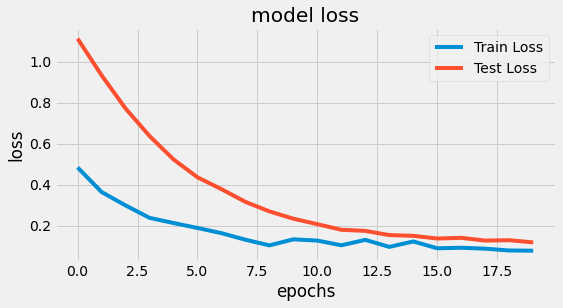

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()

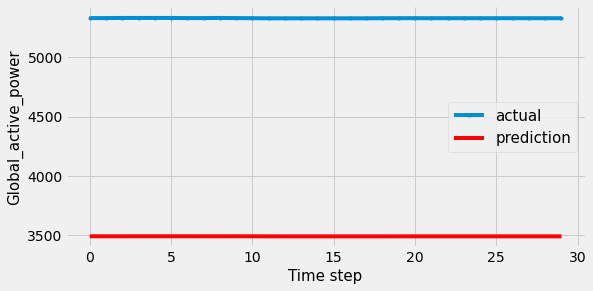

In [ ]:
import seaborn as sns
aa=[x for x in range(30)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_tests[0], marker='.', label="actual")
plt.plot(aa, test_predict[:,0], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();

[[   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [   0.]
 [ 792.]
 [ 806.]
 [ 806.]
 [ 806.]
 [ 806.]
 [ 806.]
 [1190.]
 [1190.]
 [1220.]
 [1220.]
 [1268.]
 [1279.]
 [1280.]
 [1290.]
 [1309.]
 [1309.]
 [  62.]
 [1418.]
 [1418.]
 [1432.]
 [1457.]
 [1512.]
 [1512.]
 [1959.]
 [2001.]
 [2305.]
 [2422.]
 [2601.]
 [2753.]
 [2914.]
 [3303.]
 [3460.]
 [3638.]
 [3799.]
 [3971.]
 [4280.]
 [4409.]
 [4560.]
 [4698.]
 [4805.]
 [4884.]
 [5013.]
 [5086.]
 [5124.]
 [5163.]
 [5191.]
 [5209.]
 [5236.]
 [5248.]
 [5249.]
 [5271.]
 [5285.]
 [5309.]
 [5316.]
 [5322.]
 [5323.]
 [5325.]
 [5328.]
 [5328.]
 [5328.]
 [5329.]
 [5329.]
 [5329.]
 [5329.]
 [5328.]
 [5328.]
 [5329.]
 [5328.]
 [5327.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5326.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]
 [5327.]]
Train on 36 samples, validate on 56 samples
Epoch 1/20
 - 1s - loss: 0.0637 - val_loss: 0.8154
Epoch 2/20
 - 0s - loss: 0.0453 - val_lo

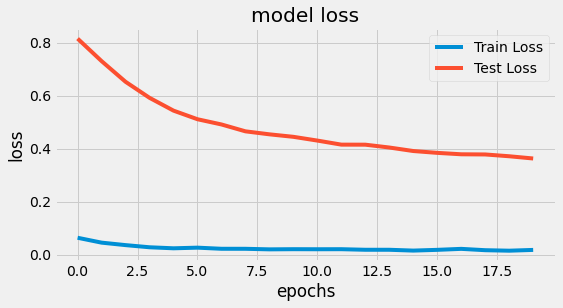

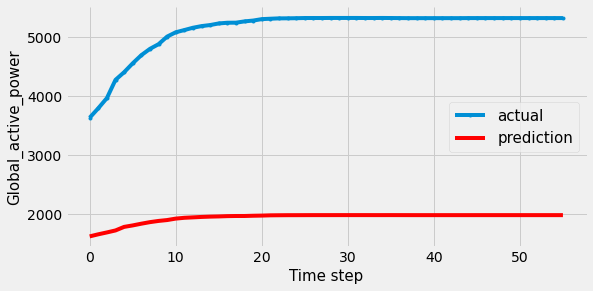

In [ ]:
cdata=sars[sars.Country=='China']
dataset=cdata.iloc[:,1].values
dataset=dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler=MinMaxScaler(feature_range=(0,1))
print(dataset)
dataset=scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.4)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]



def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 1
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

#print(X_train, Y_train)
#print(X_test, Y_test)


model = Sequential()
model.add(LSTM(5, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.5))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=1, validation_data=(X_test, Y_test), verbose=2, shuffle=True)

model.summary()


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_trains = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_tests = scaler.inverse_transform([Y_test])

print(test_predict)
print(Y_tests)

print('Train Mean Absolute Error:', mean_absolute_error(Y_trains[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_trains[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_tests[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_tests[0], test_predict[:,0])))

plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show()


import seaborn as sns
aa=[x for x in range(len(Y_tests[0]))]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_tests[0], marker='.', label="actual")
plt.plot(aa, test_predict[:,0], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()

In [ ]:
def prepare_data(sars):
    X= list()
    country=sars.Country.unique().tolist()
    for i in range(1,sars.shape[1]):
      colname=sars.columns
      #plt.figure(figsize=(35, 12))
      for j, c in enumerate(country):
        data=sars[sars['Country']==c]
        data = data.loc[~data.index.duplicated(keep='first')]
        data = data.asfreq('d')
        X.append(data)
    return X

X=prepare_data(sars)

In [ ]:
X

[            Country  ...  Number recovered
 Date                 ...                  
 2003-03-17  Germany  ...               0.0
 2003-03-18  Germany  ...               0.0
 2003-03-19  Germany  ...               0.0
 2003-03-20  Germany  ...               0.0
 2003-03-21  Germany  ...               0.0
 ...             ...  ...               ...
 2003-07-07  Germany  ...               9.0
 2003-07-08  Germany  ...               9.0
 2003-07-09  Germany  ...               9.0
 2003-07-10  Germany  ...               9.0
 2003-07-11  Germany  ...               9.0
 
 [117 rows x 4 columns],            Country  ...  Number recovered
 Date                ...                  
 2003-03-17  Canada  ...               0.0
 2003-03-18  Canada  ...               0.0
 2003-03-19  Canada  ...               0.0
 2003-03-20  Canada  ...               0.0
 2003-03-21  Canada  ...               0.0
 ...            ...  ...               ...
 2003-07-07  Canada  ...             193.0
 2003-07-08  Ca

In [ ]:
# Plot closing price

country=sars.Country.unique().tolist()
for i in range(1,sars.shape[1]):
  colname=data.columns
  #plt.figure(figsize=(35, 12))
  for j, c in enumerate(country):
    data=sars[sars['Country']==c]
    data = data.loc[~data.index.duplicated(keep='first')]
    data = data.asfreq('d')
    #plt.plot(data.iloc[:,i], label=c)
    #plt.title(colname[i])
    #plt.ylabel('Count')
    #plt.xlabel('Day')
    #plt.ylim(top=6000)
    #plt.grid(True)
    #y_pos = data.iloc[-1,i] - 0.5
    #plt.text(date('2003-07-15'), y_pos, c)
    if j==10: break
  plt.legend()
  plt.show()